# Car_Price_Prediction_Model

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [51]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


1. find correlation between numeric features

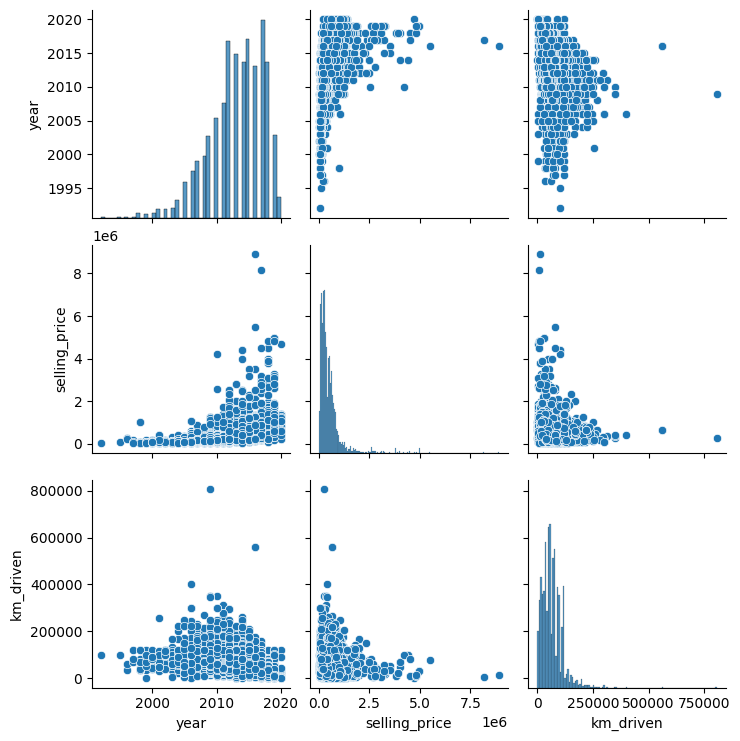

In [ ]:
sns.pairplot(df)

2. Find Distribution of selling Price

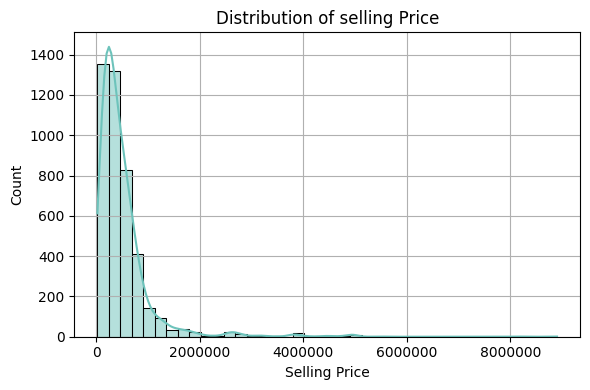

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df['selling_price'],bins=40,kde=True,color='#6DC3BB')
plt.title("Distribution of selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.ticklabel_format(style='plain',axis='x')
plt.tight_layout()
plt.grid(True)
plt.show()

3. find correlation between two numeric features using scatter plot

<Figure size 600x400 with 0 Axes>

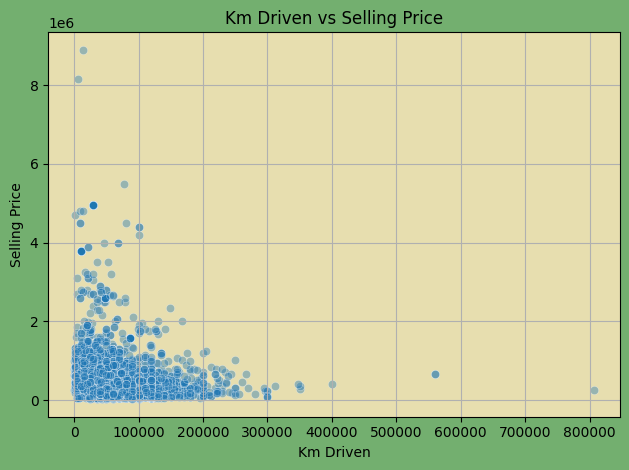

In [7]:
plt.figure(figsize=(6,4))
fig = plt.figure(facecolor='#73AF6F') 
sns.scatterplot(x='km_driven',y='selling_price',data=df,alpha=0.4)
plt.title("Km Driven vs Selling Price")
plt.xlabel("Km Driven")
plt.ylabel("Selling Price")
plt.gca().set_facecolor("#E7DEAF")
plt.tight_layout()
plt.grid(True)
plt.show()

In [8]:
df['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

4. find Mean Seller Price

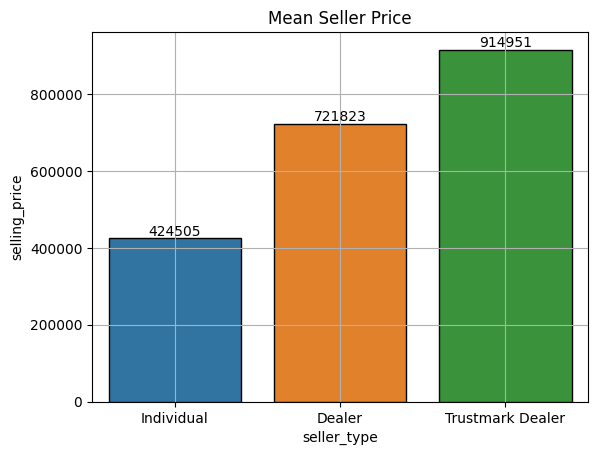

In [58]:
plt.title("Mean Seller Price")
a = sns.barplot(x='seller_type'
                ,y='selling_price'
                ,data=df,
                hue='seller_type',
                errorbar=None,
                edgecolor='black')
for i in a.containers:
    a.bar_label(i)
plt.grid(True)

5. find No.Of Selling Each Type

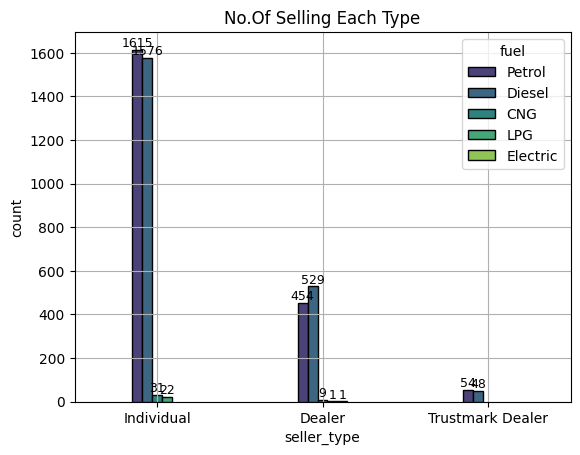

In [10]:
plt.title("No.Of Selling Each Type")
a = sns.countplot(x='seller_type',data=df,
              hue='fuel',
              width=0.3,
              edgecolor='black',palette='viridis')
plt.grid(True)
for i in a.containers:
    a.bar_label(i,color='black',fontsize=9)

6. find Distribution of km_driven based on seller_type

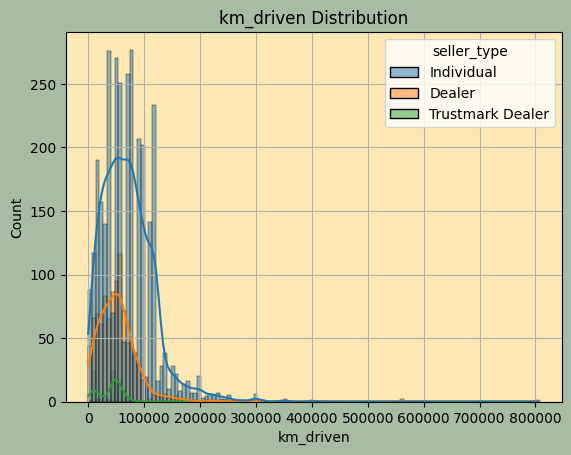

In [11]:
plt.Figure(figsize=(4,4))
plt.figure(facecolor='#A8BBA3')
plt.gca().set_facecolor('#FDE7B3')
sns.histplot(x='km_driven',data=df,
             kde=True,
             hue='seller_type')
plt.title("km_driven Distribution")
plt.grid()

7. Check outliers between seller_type and selling_price

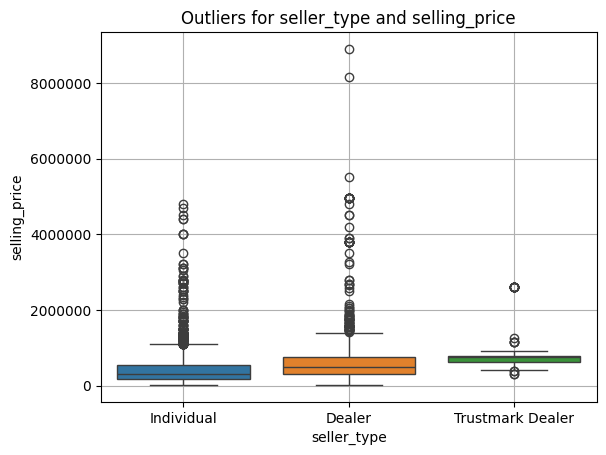

In [12]:
plt.title("Outliers for seller_type and selling_price")
sns.boxplot(x='seller_type',y='selling_price',data=df,hue='seller_type')
plt.ticklabel_format(style='plain',axis='y')
plt.grid(True)

In [13]:
q1 = df['selling_price'].quantile(0.25)
q3 = df['selling_price'].quantile(0.75)

In [14]:
IQR = q3-q1
IQR

np.float64(391250.25)

In [15]:
upper_limit = q3+0.5*IQR
lower_limit = q1-0.5*IQR

In [16]:
lower_limit

np.float64(13124.625)

In [17]:
upper_limit

np.float64(795625.125)

In [18]:
outliers = df[(df['selling_price']>lower_limit)|(df['selling_price']<upper_limit)]

In [19]:
df = df[(df['selling_price']>lower_limit)&(df['selling_price']<upper_limit)]

7.1. Remove outliers between seller_type and selling_price

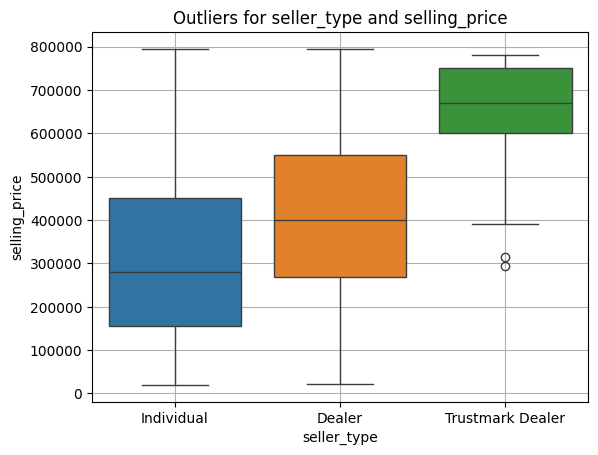

In [20]:
plt.title("Outliers for seller_type and selling_price")
sns.boxplot(x='seller_type',y='selling_price',data=df,hue='seller_type')
plt.ticklabel_format(style='plain',axis='y')
plt.grid(True)

Replacing Values from characters to numeric for machine learning prediction

In [21]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [22]:
df['fuel']=df['fuel'].map({'Petrol':1,'Diesel':2, 'CNG':3, 'LPG':4, 'Electric':5})

C:\Users\PCP\AppData\Local\Temp\ipykernel_15196\3369059151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel']=df['fuel'].map({'Petrol':1,'Diesel':2, 'CNG':3, 'LPG':4, 'Electric':5})


In [23]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [24]:
df['seller_type']=df['seller_type'].map({'Individual':1, 'Dealer':2, 'Trustmark Dealer':3})

C:\Users\PCP\AppData\Local\Temp\ipykernel_15196\1044477256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_type']=df['seller_type'].map({'Individual':1, 'Dealer':2, 'Trustmark Dealer':3})


In [25]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [26]:
df['transmission']=df['transmission'].map({'Manual':0, 'Automatic':1})

C:\Users\PCP\AppData\Local\Temp\ipykernel_15196\3518967880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission']=df['transmission'].map({'Manual':0, 'Automatic':1})


In [27]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [28]:
df['owner']=df['owner'].map({'First Owner':1, 'Second Owner':2, 'Fourth & Above Owner':3,
                             'Third Owner':4, 'Test Drive Car':5})

C:\Users\PCP\AppData\Local\Temp\ipykernel_15196\244886635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner']=df['owner'].map({'First Owner':1, 'Second Owner':2, 'Fourth & Above Owner':3,


In [29]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,0,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,0,2


In [30]:
x = df.drop(columns=['name','selling_price'])
y = df.iloc[:,2]

In [31]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4334    600000
4335    409999
4336    409999
4337    110000
4339    225000
Name: selling_price, Length: 3733, dtype: int64

In [32]:
x

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,1,0,1
1,2007,50000,1,1,0,1
2,2012,100000,2,1,0,1
3,2017,46000,1,1,0,1
4,2014,141000,2,1,0,2
...,...,...,...,...,...,...
4334,2012,170000,2,1,0,1
4335,2014,80000,2,1,0,2
4336,2014,80000,2,1,0,2
4337,2009,83000,1,1,0,2


8. trainedd machin learning model for car price prediction

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=2)

In [34]:
len(x_train)

2613

In [35]:
len(x_test)

1120

In [36]:
len(y_train)

2613

In [37]:
len(y_test)

1120

In [38]:
lr = LinearRegression()

9. fit machine learning model

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

10. store model in pickel file 

In [40]:
import pickle

In [41]:
with open('car_train_model.pkl','wb') as file:
    pickle.dump(lr,file)

In [42]:
with open('car_train_model.pkl','rb') as file:
    load_pkl = pickle.load(file)

In [43]:
x.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,1,0,1
1,2007,50000,1,1,0,1
2,2012,100000,2,1,0,1
3,2017,46000,1,1,0,1
4,2014,141000,2,1,0,2


11. predict price based on features

In [44]:
lr.predict([[2014,	141000,	2,	1,	0,	2]])

C:\Users\PCP\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([400193.08326902])

In [45]:
lr.predict([[2007,50000,1,1,0,1]])

C:\Users\PCP\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([133648.26662859])

In [46]:
load_pkl.predict(x_test)

array([531138.88764156, 530950.14761988, 398828.2277403 , ...,
       262521.77904932, 297899.61233313, 509130.13258988], shape=(1120,))